In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/152.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Import required libraries
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sklearn.model_selection import train_test_split
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.evaluation.single_table import evaluate_quality
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "/content/Titanic-Dataset.csv"
data = pd.read_csv(url)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Preprocessing Titanic dataset
data.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)
data.dropna(inplace=True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# Label encoding for categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,1
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [ ]:
# Split into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Separate features and target
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']
X_test = test_data.drop(columns=['Survived'])
y_test = test_data['Survived']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create metadata from Titanic dataset
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)

# Instantiate Gaussian Copula synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Fit the synthesizer on the training data
synthesizer.fit(train_data)

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=len(train_data))

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
# View synthetic data
synthetic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,162991123,0,3,1,38.30,0,0,4.5745,2
1,308666814,1,2,1,15.45,1,0,17.7013,2
2,962503730,0,1,1,27.79,3,0,8.0318,2
3,120675672,0,3,1,11.89,0,1,1.1122,2
4,759530279,0,3,0,17.56,0,0,27.1010,2
...,...,...,...,...,...,...,...,...,...
564,722834366,0,2,1,59.13,1,0,119.0938,0
565,721668235,0,1,1,45.09,2,0,25.4248,2
566,46340487,1,2,0,40.59,0,0,19.3588,2
567,423234524,1,3,0,10.69,0,0,59.5702,2


In [ ]:
# Run a diagnostic to ensure that the data is valid
from sdv.evaluation.single_table import run_diagnostic

diagnostic=run_diagnostic(train_data, synthetic_data, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 422.20it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 188.81it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



**From above we can see that the score is 100%, indicating that the data is fully valid.**

In [ ]:
# Evaluate synthetic data quality
quality_report = evaluate_quality(train_data, synthetic_data, metadata)
quality_report.get_details('Column Shapes')


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 670.67it/s]|
Column Shapes Score: 94.29%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 173.45it/s]|
Column Pair Trends Score: 80.88%

Overall Score (Average): 87.58%



,Column,Metric,Score
0,Survived,TVComplement,0.982425
1,Pclass,TVComplement,0.977153
2,Sex,TVComplement,0.977153
3,Age,KSComplement,0.840070
4,SibSp,TVComplement,0.973638
5,Parch,TVComplement,0.970123
6,Fare,KSComplement,0.831283
7,Embarked,TVComplement,0.991213


**According to the overall score, the synthetic data is about 88% similar to the real data in terms of statistical similarity.**

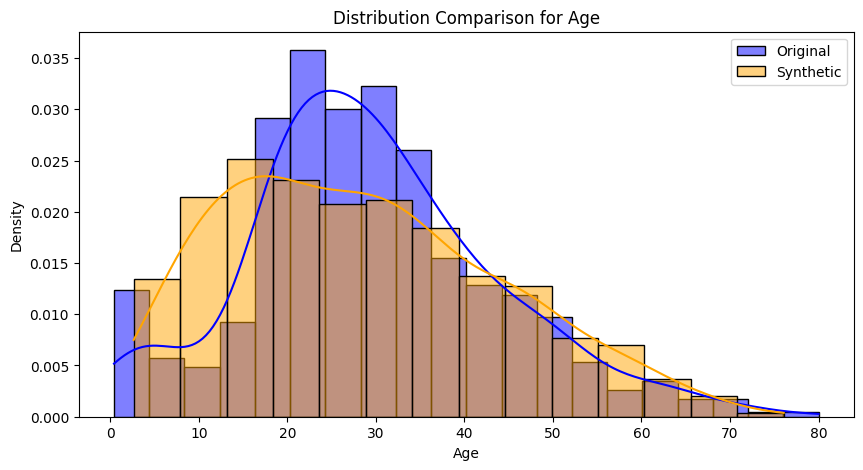

In [ ]:
# Plot distribution comparison for a sample feature
for col in X_train.columns[3:4]:
    plt.figure(figsize=(10, 5))
    sns.histplot(X_train[col], color='blue', label='Original', kde=True, stat='density')
    sns.histplot(synthetic_data[col], color='orange', label='Synthetic', kde=True, stat='density')
    plt.title(f'Distribution Comparison for {col}')
    plt.legend()
    plt.show()

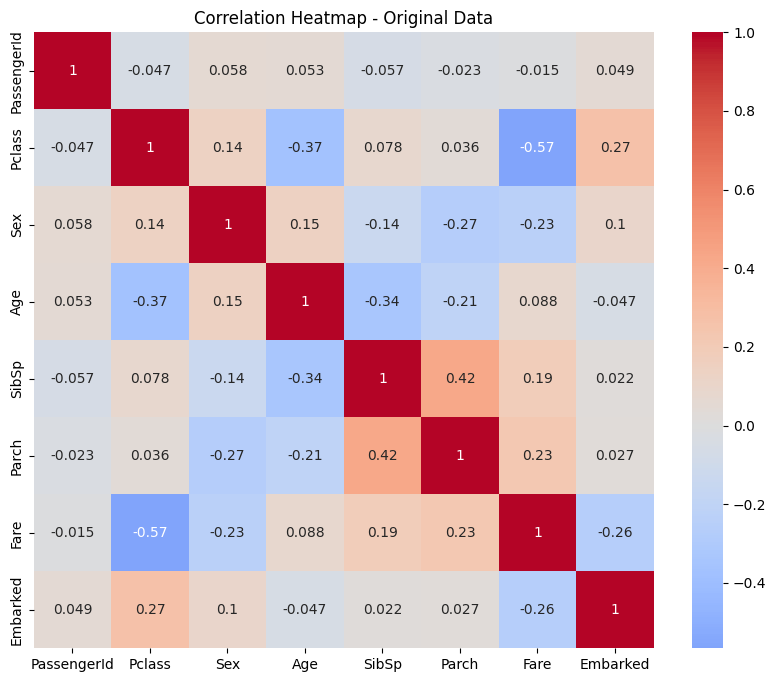

In [ ]:
# Compute correlation matrices
corr_original = X_train.corr()
corr_synthetic = synthetic_data.corr()

# Plot heatmap for original data
plt.figure(figsize=(10, 8))
sns.heatmap(corr_original, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap - Original Data')
plt.show()

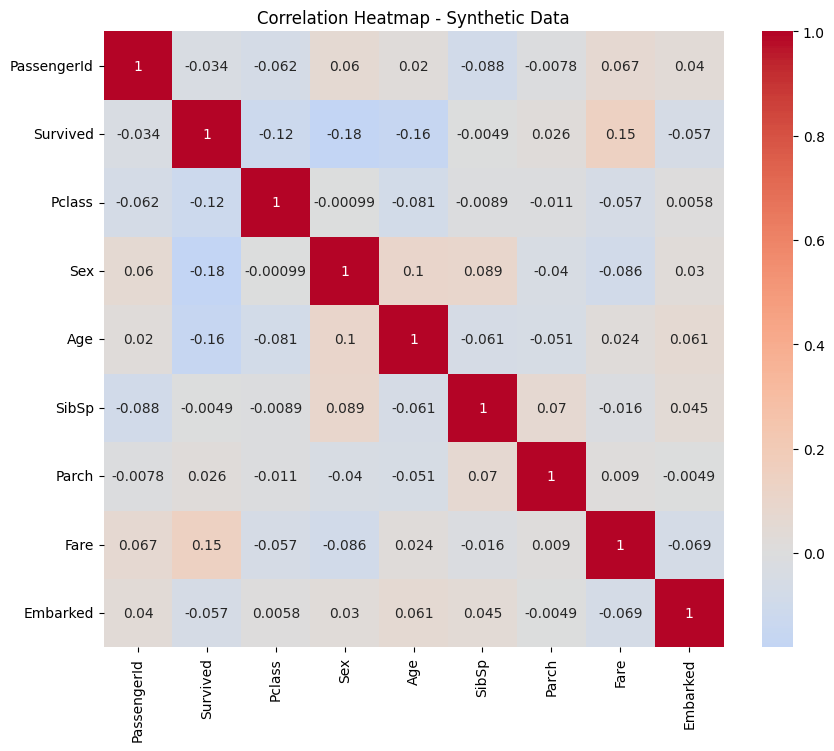

In [ ]:
# Plot heatmap for synthetic data
plt.figure(figsize=(10, 8))
sns.heatmap(corr_synthetic, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap - Synthetic Data')
plt.show()

In [ ]:
# Utility function for evaluating models
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Naive Bayes, SVM, and Random Forest models
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluate on real data
print("Real Data Results:")
for name, model in models.items():
    accuracy = evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, model)
    print(f"{name}: Accuracy = {accuracy:.4f}")

# Preprocess synthetic data
X_synth = synthetic_data.drop(columns=['Survived'])
y_synth = synthetic_data['Survived']
X_synth_scaled = scaler.fit_transform(X_synth)

# Evaluate on synthetic data
print("\nSynthetic Data Results:")
for name, model in models.items():
    accuracy = evaluate_model(X_synth_scaled, y_synth, X_test_scaled, y_test, model)
    print(f"{name}: Accuracy = {accuracy:.4f}")


Real Data Results:
Naive Bayes: Accuracy = 0.7552
SVM: Accuracy = 0.8322
Random Forest: Accuracy = 0.8042

Synthetic Data Results:
Naive Bayes: Accuracy = 0.7413
SVM: Accuracy = 0.6923
Random Forest: Accuracy = 0.6783
